In [41]:
import numpy as np

np.random.seed(42)

In [67]:
import strawberryfields as sf
from strawberryfields.ops import *
from scipy.stats import unitary_group

n_wires = 4
cutoff = 3 #The cutoff is crucial here for calculating Fock probabilities

#Initialize the circuit
boson_sampling_circuit = sf.Program(n_wires)

# define the linear interferometer
U_interferometer = unitary_group.rvs(4)
print(U_interferometer)

[[ 0.06775892+0.16300837j -0.2195115 +0.88035426j  0.06882153+0.12790945j
   0.35159543-0.03019121j]
 [-0.27973364+0.30193374j  0.1577798 +0.28412608j  0.00744449-0.4669026j
  -0.48589977+0.52039502j]
 [ 0.11323677-0.24459285j  0.02931785-0.11273776j  0.77764982-0.19091662j
   0.34318679+0.39346774j]
 [-0.43602107+0.73257048j  0.0831171 -0.22514706j  0.30707269+0.1592711j
   0.22356318-0.21444127j]]


In [68]:
# Construct the circuit:
#    a. Apply Squeezed Vacuum states
#    b. Apply the Interferometer
#    c. Measure in the Fock basis
with boson_sampling_circuit.context as q:
    # Apply Squeezed Vacuum states to each mode
    # The 'r' parameter is the squeezing parameter (strength of squeezing)
    # A common range is 0.1 to 1.5, or even higher for strong squeezing.
    # We apply a S2gate (two-mode squeezing) for a single mode by leaving the second mode implicit,
    # or by applying Sgate for single-mode squeezing. S2gate is often used in context
    # of initial states for GBS if you consider paired modes, but for a simple
    # squeezed vacuum state per mode, Sgate is more direct.
    Sgate(1) | q[0]
    Sgate(1) | q[1]
    Sgate(1) | q[2]
    Sgate(1) | q[3]

    # The Interferometer (the unitary matrix U) operation takes the unitary matrix and applies it across the specified wires.
    Interferometer(U_interferometer) | tuple(q) # Apply U to all wires

    # Measure in the Fock basis (photon number resolving detection)
    # This will return the number of photons detected in each of the 4 modes.
    MeasureFock() | q

#Select the Strawberry Fields Gaussian backend
eng = sf.Engine('gaussian')

#'shots' defines how many times to run the experiment to collect samples
num_shots = 1000
results = eng.run(boson_sampling_circuit, shots=num_shots)

print(f"\nSampled photon number outcomes (first {min(10, num_shots)} out of {num_shots}):")
print(results.samples[:min(10, num_shots)]) # Print the first few samples

# You can also get other information, like the means of the distribution
# if you don't perform MeasureFock (e.g., if you only simulate the Gaussian state).
# For GBS, the 'samples' are the primary output.

c:\Users\yasha\.conda\envs\ibmqc\lib\site-packages\strawberryfields\backends\gaussianbackend\backend.py:216: UserWarning: Cannot simulate non-Gaussian states. Conditional state after Fock measurement has not been updated.



Sampled photon number outcomes (first 10 out of 1000):
[[0 0 0 0]
 [2 1 0 3]
 [0 0 0 2]
 [0 2 0 2]
 [0 0 0 2]
 [0 2 0 0]
 [0 0 0 0]
 [3 2 4 1]
 [4 2 0 0]
 [0 0 0 0]]


In [58]:
#Construct the circuit:
with boson_sampling_circuit.context as q:
    Sgate(1) | q[0]
    Sgate(1) | q[1]
    Sgate(1) | q[2]
    Sgate(1) | q[3]

    Interferometer(U_interferometer) | tuple(q)

#Select the Strawberry Fields Gaussian backend
eng = sf.Engine('gaussian')

# When not specifying 'shots', eng.run() returns a Result object containing the quantum state.
results = eng.run(boson_sampling_circuit)

state = results.state #This is a BaseGaussianState object

#Calculate the Fock state probabilities using all_fock_probs()
#This method takes the cutoff as a keyword argument
flat_probs = state.all_fock_probs(cutoff=cutoff)

#Reshape the flat probabilities into a multi-dimensional tensor
probs = flat_probs.reshape([cutoff] * n_wires)
print(f"\nShape of the probability tensor (probs.shape): {probs.shape}")

#Define the Fock states to measure
measure_states = [
    (0, 0, 0, 0),
    (1, 1, 0, 0),
    (0, 1, 0, 1),
    (1, 1, 1, 1),
    (2, 0, 0, 0),
]

print("\nProbabilities of specific Fock states:")
for i in measure_states:
    if all(photon_num < cutoff for photon_num in i):
        prob = probs[i]
        if prob < 1e-10:
             print(f"|{''.join(str(j) for j in i)}>: ~0 (exact: {prob:.2e})")
        else:
             print(f"|{''.join(str(j) for j in i)}>: {prob:.6f}")
    else:
        print(f"|{''.join(str(j) for j in i)}>: (State not in current Fock space cutoff of {cutoff})")


Shape of the probability tensor (probs.shape): (4, 4, 4, 4)

Probabilities of specific Fock states:
|0000>: 0.176378
|1100>: 0.007339
|0101>: 0.000611
|1111>: 0.000597
|2000>: 0.032246



Shape of the probability tensor (probs.shape): (3, 3, 3, 3)


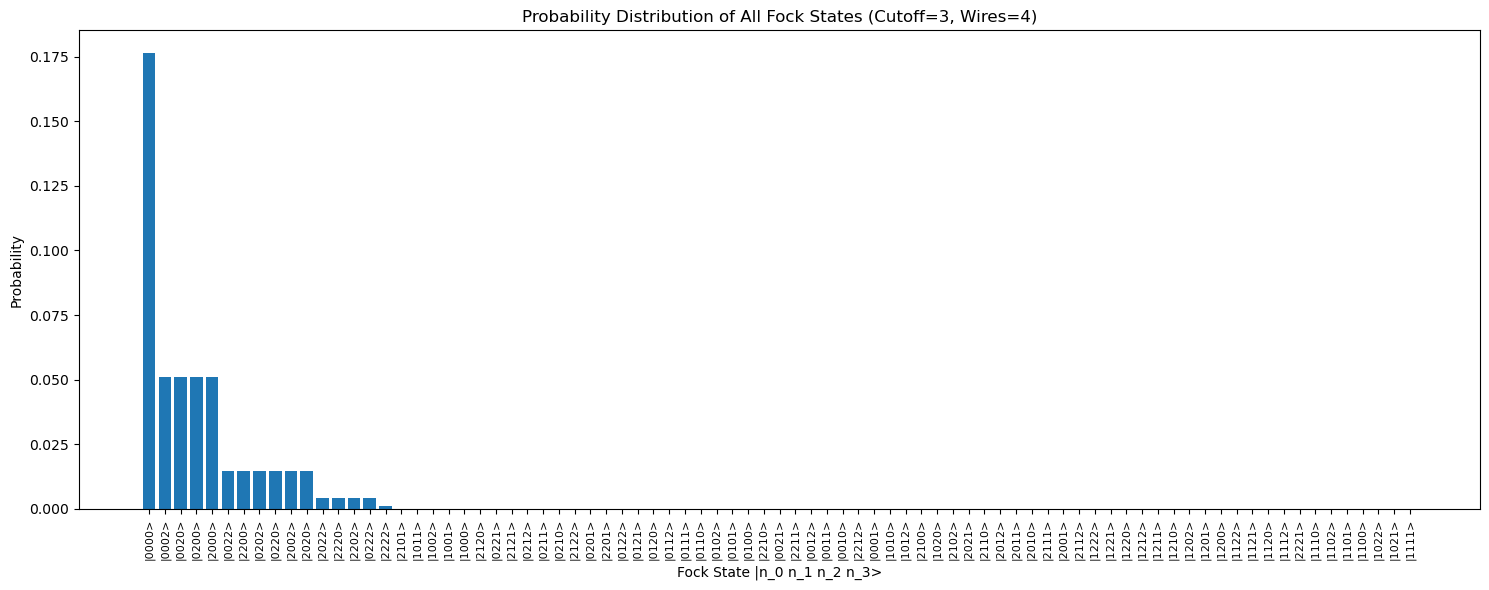

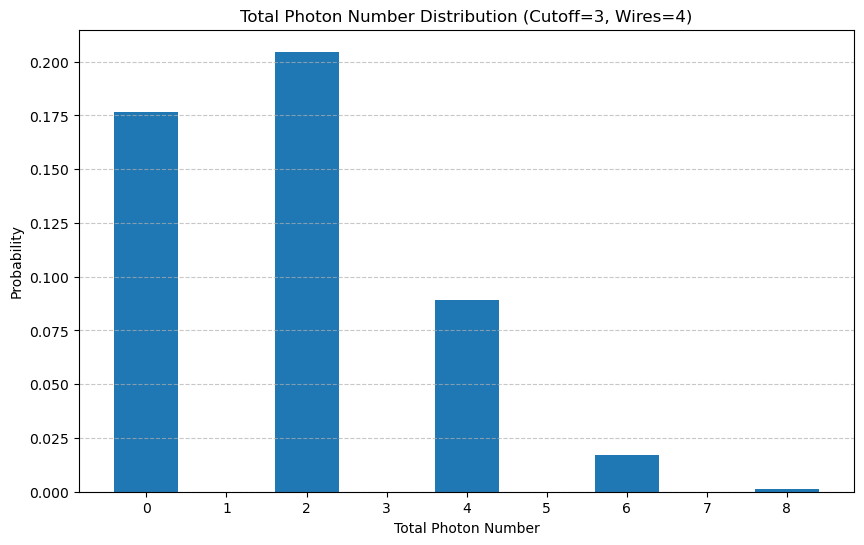


Successfully generated plots!


In [70]:
#Initialize the circuit
boson_sampling_circuit = sf.Program(n_wires)

#Construct the circuit:
with boson_sampling_circuit.context as q:
    Sgate(1) | q[0]
    Sgate(1) | q[1]
    Sgate(1) | q[2]
    Sgate(1) | q[3]

    #Interferometer(U_interferometer) | tuple(q)

#Select the Strawberry Fields Gaussian backend
eng = sf.Engine('gaussian')

# When not specifying 'shots', eng.run() returns a Result object containing the quantum state.
results = eng.run(boson_sampling_circuit)

state = results.state #This is a BaseGaussianState object

#Calculate the Fock state probabilities using all_fock_probs()
#This method takes the cutoff as a keyword argument
flat_probs = state.all_fock_probs(cutoff=cutoff)

#Reshape the flat probabilities into a multi-dimensional tensor
probs = flat_probs.reshape([cutoff] * n_wires)
print(f"\nShape of the probability tensor (probs.shape): {probs.shape}")

import matplotlib.pyplot as plt
from itertools import product # To generate all Fock states

# 1. Flattened Bar Plot of All Fock States (for small cutoffs)
if cutoff**n_wires <= 100: # Only plot if manageable number of states
    all_fock_states_labels = []
    all_fock_states_probs = []

    # Generate all possible Fock states within the cutoff
    for fock_state_tuple in product(range(cutoff), repeat=n_wires):
        label = "".join(str(p) for p in fock_state_tuple)
        all_fock_states_labels.append(f"|{label}>")
        all_fock_states_probs.append(probs[fock_state_tuple])

    # Sort by probability for better visualization
    sorted_indices = np.argsort(all_fock_states_probs)[::-1] # Descending order
    sorted_labels = [all_fock_states_labels[i] for i in sorted_indices]
    sorted_probs = [all_fock_states_probs[i] for i in sorted_indices]

    plt.figure(figsize=(15, 6))
    plt.bar(sorted_labels, sorted_probs)
    plt.xticks(rotation=90, fontsize=8)
    plt.xlabel("Fock State |n_0 n_1 n_2 n_3>")
    plt.ylabel("Probability")
    plt.title(f"Probability Distribution of All Fock States (Cutoff={cutoff}, Wires={n_wires})")
    plt.tight_layout()
    plt.show()
else:
    print(f"\nSkipping full Fock state plot: Too many states ({cutoff**n_wires}) for direct bar plot.")


# 2. Total Photon Number Distribution
total_photon_counts = np.zeros(n_wires * (cutoff - 1) + 1) # Max possible total photons

# Iterate through all possible Fock states and sum their probabilities
for indices, prob_val in np.ndenumerate(probs):
    total_photons = sum(indices)
    total_photon_counts[total_photons] += prob_val

plt.figure(figsize=(10, 6))
plt.bar(range(len(total_photon_counts)), total_photon_counts)
plt.xlabel("Total Photon Number")
plt.ylabel("Probability")
plt.title(f"Total Photon Number Distribution (Cutoff={cutoff}, Wires={n_wires})")
plt.xticks(range(len(total_photon_counts))) # Ensure integer ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nSuccessfully generated plots!")


Shape of the probability tensor (probs.shape): (3, 3, 3, 3)


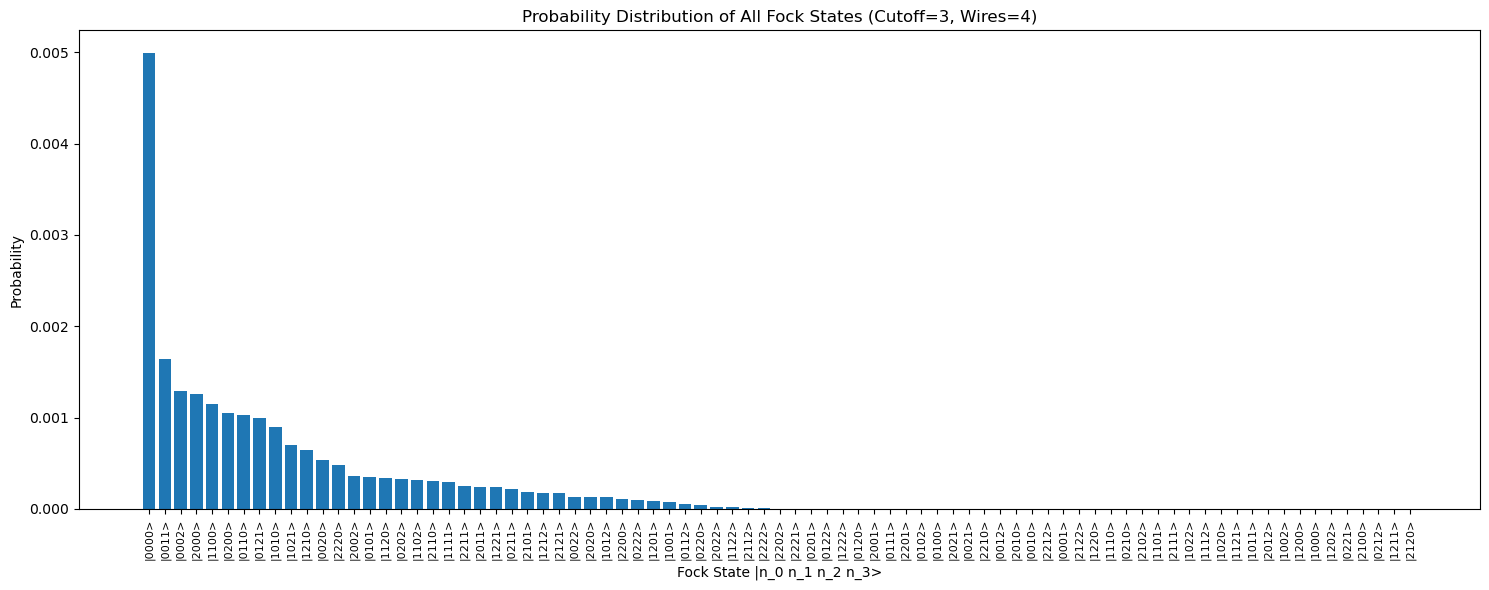

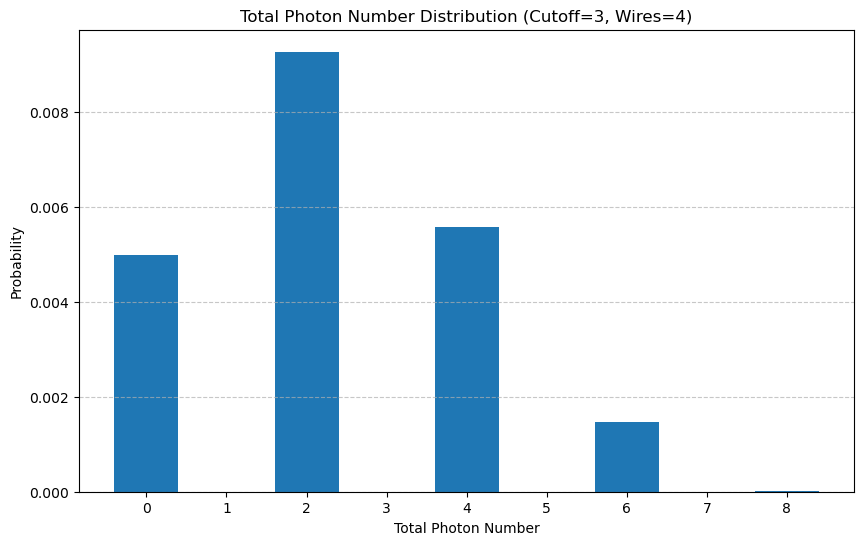


Successfully generated plots!


In [72]:
#Initialize the circuit
boson_sampling_circuit = sf.Program(n_wires)

#Construct the circuit:
with boson_sampling_circuit.context as q:
    Sgate(2) | q[0]
    Sgate(2) | q[1]
    Sgate(2) | q[2]
    Sgate(2) | q[3]

    Interferometer(U_interferometer) | tuple(q)

#Select the Strawberry Fields Gaussian backend
eng = sf.Engine('gaussian')

# When not specifying 'shots', eng.run() returns a Result object containing the quantum state.
results = eng.run(boson_sampling_circuit)

state = results.state #This is a BaseGaussianState object

#Calculate the Fock state probabilities using all_fock_probs()
#This method takes the cutoff as a keyword argument
flat_probs = state.all_fock_probs(cutoff=cutoff)

#Reshape the flat probabilities into a multi-dimensional tensor
probs = flat_probs.reshape([cutoff] * n_wires)
print(f"\nShape of the probability tensor (probs.shape): {probs.shape}")

import matplotlib.pyplot as plt
from itertools import product # To generate all Fock states

# 1. Flattened Bar Plot of All Fock States (for small cutoffs)
if cutoff**n_wires <= 100: # Only plot if manageable number of states
    all_fock_states_labels = []
    all_fock_states_probs = []

    # Generate all possible Fock states within the cutoff
    for fock_state_tuple in product(range(cutoff), repeat=n_wires):
        label = "".join(str(p) for p in fock_state_tuple)
        all_fock_states_labels.append(f"|{label}>")
        all_fock_states_probs.append(probs[fock_state_tuple])

    # Sort by probability for better visualization
    sorted_indices = np.argsort(all_fock_states_probs)[::-1] # Descending order
    sorted_labels = [all_fock_states_labels[i] for i in sorted_indices]
    sorted_probs = [all_fock_states_probs[i] for i in sorted_indices]

    plt.figure(figsize=(15, 6))
    plt.bar(sorted_labels, sorted_probs)
    plt.xticks(rotation=90, fontsize=8)
    plt.xlabel("Fock State |n_0 n_1 n_2 n_3>")
    plt.ylabel("Probability")
    plt.title(f"Probability Distribution of All Fock States (Cutoff={cutoff}, Wires={n_wires})")
    plt.tight_layout()
    plt.show()
else:
    print(f"\nSkipping full Fock state plot: Too many states ({cutoff**n_wires}) for direct bar plot.")


# 2. Total Photon Number Distribution
total_photon_counts = np.zeros(n_wires * (cutoff - 1) + 1) # Max possible total photons

# Iterate through all possible Fock states and sum their probabilities
for indices, prob_val in np.ndenumerate(probs):
    total_photons = sum(indices)
    total_photon_counts[total_photons] += prob_val

plt.figure(figsize=(10, 6))
plt.bar(range(len(total_photon_counts)), total_photon_counts)
plt.xlabel("Total Photon Number")
plt.ylabel("Probability")
plt.title(f"Total Photon Number Distribution (Cutoff={cutoff}, Wires={n_wires})")
plt.xticks(range(len(total_photon_counts))) # Ensure integer ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nSuccessfully generated plots!")


In [28]:
#Calculating the Hafian

from thewalrus import hafnian as haf

B = (np.dot(U_interferometer, U_interferometer.T) * np.tanh(1))
print(B[:, [0, 1]][[0, 1]])

[[-0.38408578+0.30038219j  0.33887924-0.19986857j]
 [ 0.33887924-0.19986857j  0.32912369+0.23920828j]]


In [24]:
#Result for [0,0,0,0]
print(1 / np.cosh(1) ** 4)

0.1763784476141347


In [27]:
#Result for [1,1,0,0]
B = (np.dot(U_interferometer, U_interferometer.T) * np.tanh(1))[:, [0, 1]][[0, 1]]
print(np.abs(haf(B)) ** 2 / np.cosh(1) ** 4)

0.02730101740334564
